# Подсчёт pi с использованием метода Монте-Карло

## Формулы
- square area: $s = (2 r)^2$
- circle area: $c = \pi r^2$
- $c/s = (\pi r^2) / (4 r^2) = \pi / 4$
- $\pi = 4 * c/s$

## Изображение для визуализации концепции
![Darts](https://raw.githubusercontent.com/coderefinery/jupyter/main/example/darts.svg)


In [1]:
# Импорт необходимых модулей
import random
import matplotlib.pyplot as plt

In [2]:
# Инициализация количества "бросков" 
num_points = 1000

In [3]:
points = []
hits = 0
for _ in range(num_points):
    x, y = random.random(), random.random()
    if x*x + y*y < 1.0:
        hits += 1
        points.append((x, y, "red"))
    else:
        points.append((x, y, "blue"))

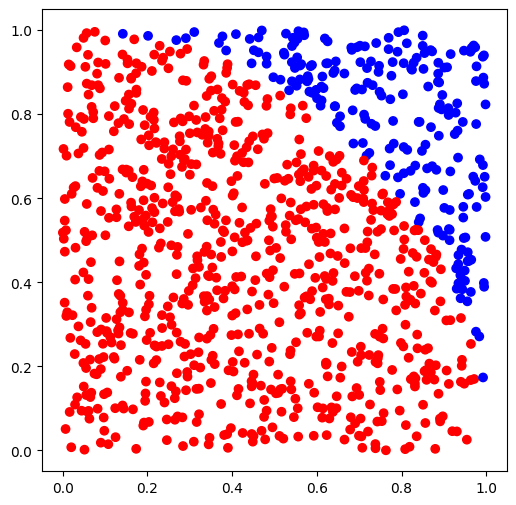

In [4]:
# Распакуем точки в 3 списка 
x, y, colors = zip(*points)
# Определяем размеры фигуры
fig, ax = plt.subplots()
fig.set_size_inches(6.0, 6.0)
# Рисуем результат
ax.scatter(x, y, c=colors)

In [5]:
# Считаем оценку
fraction = hits / num_points
4 * fraction

3.112

In [6]:
import random
from ipywidgets import interact, widgets

%matplotlib inline
from matplotlib import pyplot


def throw_darts(num_points):
    points = []
    hits = 0
    for _ in range(num_points):
        x, y = random.random(), random.random()
        if y > 0.66:
            hits += 1
            points.append((x, y, "black"))
        elif y > 0.33:
            points.append((x, y, "red"))
        else:
            points.append((x, y, "yellow"))
    fraction = hits / num_points
    pi = 4 * fraction
    return pi, points


def create_plot(points):
    x, y, colors = zip(*points)
    pyplot.scatter(x, y, c=colors)


def experiment(num_points):
    pi, points = throw_darts(num_points)
    create_plot(points)
    print("approximation:", pi)


approximation: 1.446


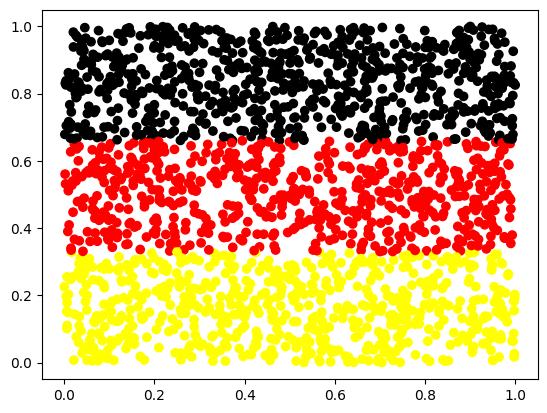

interactive(children=(IntSlider(value=1000, description='num_points', max=10000, min=100, step=100), Output())…

<function __main__.experiment(num_points)>

In [7]:
num_points = 2000
experiment(num_points)
interact(experiment, num_points=widgets.IntSlider(min=100, max=10000, step=100,
value=1000))

In [8]:
import numpy as np
from ipywidgets import interact
import matplotlib.pyplot as plt

%matplotlib inline

def gaussian(x, a, b, c):
    return a * np.exp(-b * (x-c)**2)
    
def noisy_gaussian():
    # gaussian array y in interval -5 <= x <= 5
    nx = 100
    x = np.linspace(-5.0, 5.0, nx)
    y = gaussian(x, a=2.0, b=0.5, c=1.5)
    noise = np.random.normal(0.0, 0.2, nx)
    y += noise
    return x, y
    
def fit(x, y, n):
    pfit = np.polyfit(x, y, n)
    yfit = np.polyval(pfit, x)
    return yfit
    
def plot(x, y, yfit):
    plt.plot(x, y, "r", label="Data")
    plt.plot(x, yfit, "b", label="Fit")
    plt.legend()
    plt.ylim(-0.5, 2.5)
    plt.show()
x, y = noisy_gaussian()
    
@interact
def slider(n=(3, 30)):
    yfit = fit(x, y, n)
    plot(x, y, yfit)

interactive(children=(IntSlider(value=16, description='n', max=30, min=3), Output()), _dom_classes=('widget-in…